<a href="https://colab.research.google.com/github/MidoriTinto/Python_Fundamentals/blob/main/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
url="https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
page_views=pd.read_csv(url)
page_views

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [ ]:
page_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [ ]:
page_views['date'] = pd.to_datetime(page_views.date)
page_views
page_views['date_formatted'] = page_views['date'].dt.strftime('%m/%d/%Y')
print (page_views)


           date   value date_formatted
0    2016-05-09    1201     05/09/2016
1    2016-05-10    2329     05/10/2016
2    2016-05-11    1716     05/11/2016
3    2016-05-12   10539     05/12/2016
4    2016-05-13    6933     05/13/2016
...         ...     ...            ...
1299 2019-11-29  171584     11/29/2019
1300 2019-11-30  141161     11/30/2019
1301 2019-12-01  142918     12/01/2019
1302 2019-12-02  220144     12/02/2019
1303 2019-12-03  158549     12/03/2019

[1304 rows x 3 columns]


In [ ]:
#create 3 new columns for year, month and day (use dt.year, dt.strftime to get the month name, dt.day)

page_views['year'] = page_views['date'].dt.strftime('%Y')
page_views['month'] = page_views['date'].dt.strftime('%B')
page_views['day'] = page_views['date'].dt.strftime('%d')
page_views


,date,value,date_formatted,year,month,day
0,2016-05-09,1201,05/09/2016,2016,May,09
1,2016-05-10,2329,05/10/2016,2016,May,10
2,2016-05-11,1716,05/11/2016,2016,May,11
3,2016-05-12,10539,05/12/2016,2016,May,12
4,2016-05-13,6933,05/13/2016,2016,May,13
...,...,...,...,...,...,...
1299,2019-11-29,171584,11/29/2019,2019,November,29
1300,2019-11-30,141161,11/30/2019,2019,November,30
1301,2019-12-01,142918,12/01/2019,2019,December,01
1302,2019-12-02,220144,12/02/2019,2019,December,02


In [ ]:
#set index to 'date' column
page_views.set_index('date_formatted')
page_views

,date,value,date_formatted,year,month,day
0,2016-05-09,1201,05/09/2016,2016,May,09
1,2016-05-10,2329,05/10/2016,2016,May,10
2,2016-05-11,1716,05/11/2016,2016,May,11
3,2016-05-12,10539,05/12/2016,2016,May,12
4,2016-05-13,6933,05/13/2016,2016,May,13
...,...,...,...,...,...,...
1299,2019-11-29,171584,11/29/2019,2019,November,29
1300,2019-11-30,141161,11/30/2019,2019,November,30
1301,2019-12-01,142918,12/01/2019,2019,December,01
1302,2019-12-02,220144,12/02/2019,2019,December,02


In [ ]:
#clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
data = page_views[(page_views["value"] >= page_views["value"].quantile(0.025)) & (page_views["value"] <= page_views["value"].quantile(0.975))]
data

,date,value,date_formatted,year,month,day
10,2016-05-19,19736,05/19/2016,2016,May,19
17,2016-05-26,18060,05/26/2016,2016,May,26
18,2016-05-27,19997,05/27/2016,2016,May,27
19,2016-05-28,19044,05/28/2016,2016,May,28
20,2016-05-29,20325,05/29/2016,2016,May,29
...,...,...,...,...,...,...
1294,2019-11-24,138875,11/24/2019,2019,November,24
1299,2019-11-29,171584,11/29/2019,2019,November,29
1300,2019-11-30,141161,11/30/2019,2019,November,30
1301,2019-12-01,142918,12/01/2019,2019,December,01


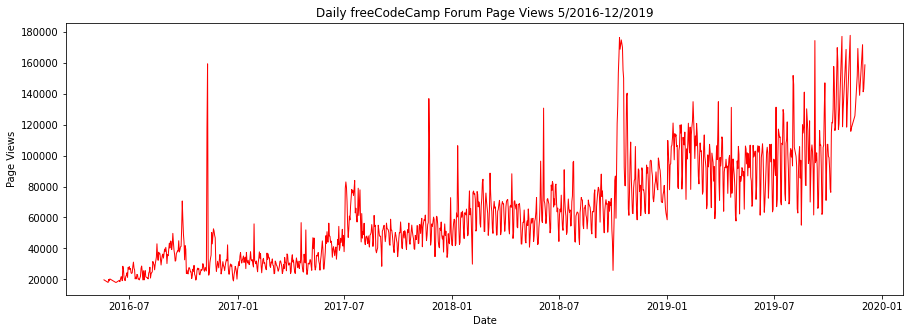

In [ ]:

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(data.date, data['value'], color='red', linewidth=1)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

plt.show()


###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


In [ ]:
page_views.groupby(['year', 'month'])['value'].agg('mean')#.reset_index()


year  month    
2016  August        31049.193548
      December      27832.419355
      July          23314.225806
      June          19124.366667
      May           11242.695652
      November      40448.633333
      October       27398.322581
      September     41476.866667
2017  April         30878.733333
      August        47712.451613
      December      48420.580645
      February      31113.071429
      January       32785.161290
      July          65806.838710
      June          43577.500000
      March         29369.096774
      May           34244.290323
      November      57701.566667
      October       47438.709677
      September     47376.800000
2018  April         62350.833333
      August        62831.612903
      December      80047.483871
      February      65679.000000
      January       58580.096774
      July          63591.064516
      June          70117.000000
      March         62693.774194
      May           56562.870968
      November      78688.3

In [ ]:
table=pd.pivot_table(data=page_views, values='value', index='year', columns='month', dropna=False)
table

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,23314.225806,19124.366667,NaN,11242.695652,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,112592.000000,65941.733333
2019,89368.433333,117991.032258,173870.333333,105968.357143,102056.516129,100804.451613,162402.600000,91214.483871,91439.903226,181026.700000,150862.709677,97268.833333


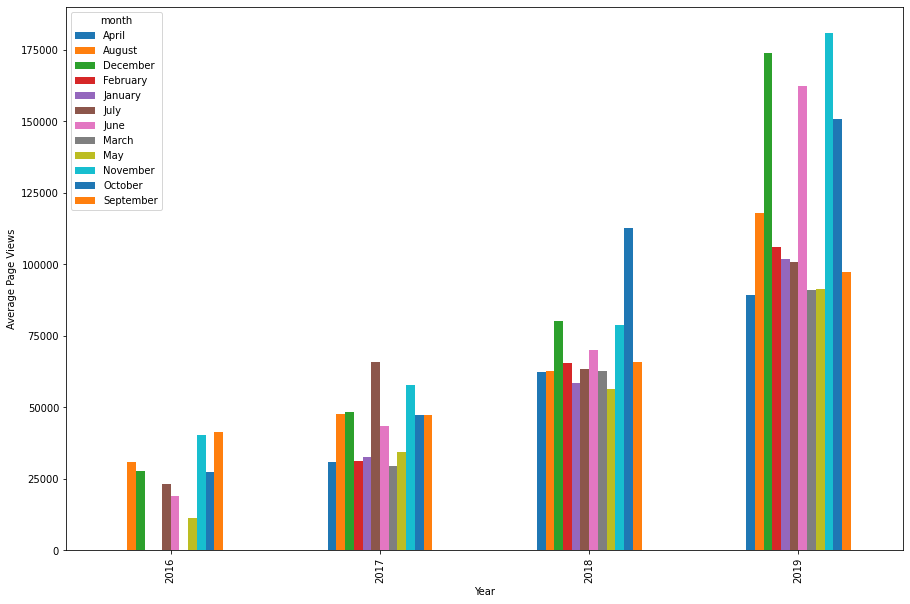

In [ ]:
table.plot(kind='bar', figsize = (15,10), xlabel = 'Year', ylabel = 'Average Page Views')







###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


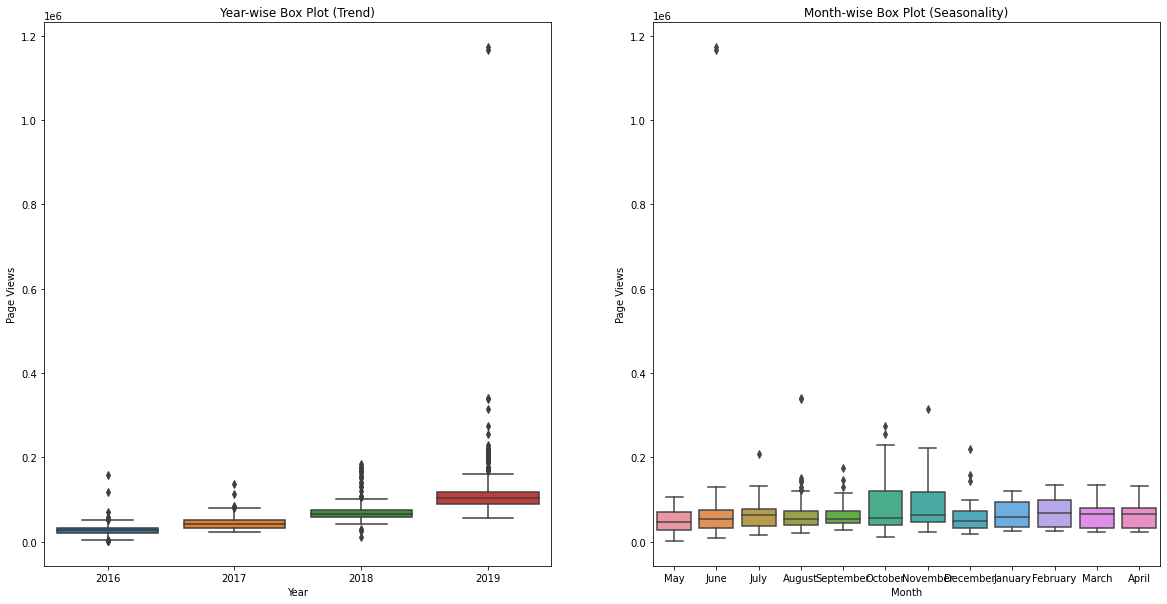

In [21]:
#from Seaborn page
#wellbeing=psych_data["Wellbeing"]
#wellbeing
#labels=["Wellbeing"]
#labels
#chart=sns.boxplot(data=wellbeing)
#chart.set_xticklabels(labels)
#chart

#For this exercise I use values available to me in page_views dataframe

# Draw box plots (using Seaborn)
fig, (plot1, plot2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
#boxplot for Trend across the years
plot1 = sns.boxplot(x=page_views["year"], y=page_views['value'], ax=plot1)
plot1.set_title('Year-wise Box Plot (Trend)') 
plot1.set_xlabel('Year')
plot1.set_ylabel('Page Views')
#boxplot for Trend across the years
plot2 = sns.boxplot(x=page_views['month'], y=page_views['value'], ax=plot2)
plot2.set_title('Month-wise Box Plot (Seasonality)')
plot2.set_xlabel('Month')
plot2.set_ylabel('Page Views')

plt.show()

###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

url="https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
page_views=pd.read_csv(url)
page_views.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [6]:
url="https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
page_views=pd.read_csv(url)
page_views
page_views['date'] = pd.to_datetime(page_views.date)
#page_views
page_views['date_formatted'] = page_views['date'].dt.strftime('%m/%d/%Y')
#print (page_views)
page_views['year'] = page_views['date'].dt.strftime('%Y')
page_views['month'] = page_views['date'].dt.strftime('%B')
page_views['day'] = page_views['date'].dt.strftime('%d')
page_views



#page_views.astype('int64')
page_views[['date','year']]=page_views[['date', 'year']].astype('int64')
page_views.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1304 non-null   int64 
 1   value           1304 non-null   int64 
 2   date_formatted  1304 non-null   object
 3   year            1304 non-null   int64 
 4   month           1304 non-null   object
 5   day             1304 non-null   object
dtypes: int64(3), object(3)
memory usage: 61.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  app.launch_new_instance()


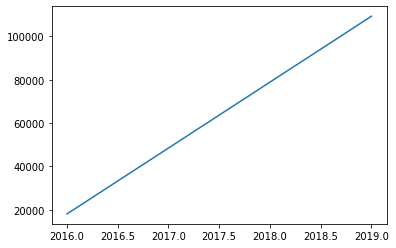

In [9]:
x=page_views["year"]
y=page_views["value"]

#plt.scatter(x,y)#FIRST SCATTER PLOT THE DATA
regression = linregress(x,y)#THEN ASSIGN RESULT OF REGRESSION TO THE PLOT
slope = regression.slope
intercept = regression.intercept
plt.plot(x, slope*x + intercept)#PLOT LINE REGRESSION
plt.show()

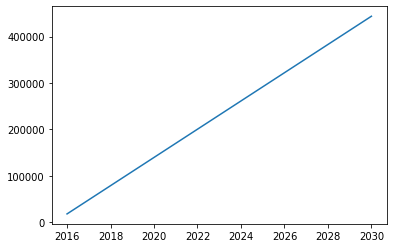

In [18]:
#prediction up to year 2030
x= page_views["year"]
y=page_views["value"]

#plt.scatter(x,y)#FIRST SCATTER PLOT THE DATA
regression = linregress(x,y)#THEN ASSIGN RESULT OF REGRESSION TO THE PLOT
slope = regression.slope
intercept = regression.intercept
prediction=np.arange(2016,2031)
plt.plot(prediction, slope*prediction + intercept)#PLOT LINE REGRESSION
plt.show()

In [ ]:

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.plot(x, m * x + b, color="red") 

# Reflect

What caused the biggest problems? Getting the linear regression to work.
How did you solve these problems? By asking for help after trying different options without avail.